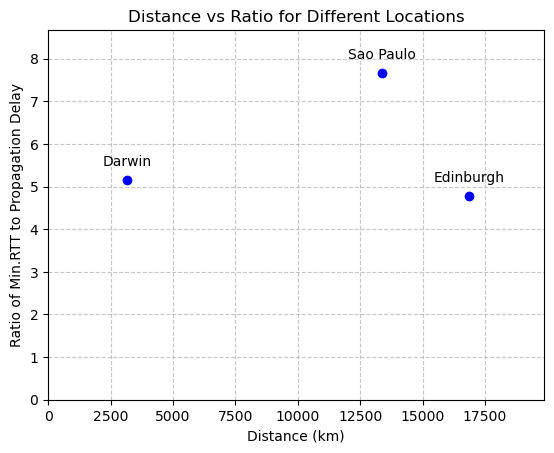

In [1]:
import matplotlib.pyplot as plt

# Data
locations = ['Darwin', 'Sao Paulo', 'Edinburgh']
"""
Follow the provided instructions to compute distances and ratios.
Uncomment the designated lists and replace them with the actual values.
Once updated, execute the command 'python3 generate_plot.py' to generate the plot.
Feel free to make any necessary customizations to suit your preferences.
"""
distances = [3151, 13370, 16869]
ratios = [5.15, 7.67, 4.78]

# Create scatter plot
plt.scatter(distances, ratios, color='blue')

# Label each point with location name with adjusted text placement
for i, location in enumerate(locations):
    plt.annotate(location, (distances[i], ratios[i]), textcoords="offset points", xytext=(0,8), ha='center', va='bottom')

# Set labels and title
plt.xlabel('Distance (km)')
plt.ylabel('Ratio of Min.RTT to Propagation Delay')
plt.title('Distance vs Ratio for Different Locations')

# Set minimum and maximum values for x-axis and y-axis
plt.xlim(0, max(distances) + 3000)  # Adjust the upper limit as needed
plt.ylim(0, max(ratios) + 1)  # Adjust the upper limit as needed

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [ ]:
from socket import *
from datetime import datetime
import time
import sys
import random


clientSocket = socket(AF_INET, SOCK_DGRAM)
# Define server address
serverIP = '127.0.0.1'
serverPort = sys.argv[2]
addr = (serverIP, serverPort)


list_rtts = []
packets_lost = 0

for i in range(10):
    time_stamp = datetime.now().isoformat(sep = ' ')[:-3]
    # the message to be sent to the server
    ping_message = "PING" + str(i) + ' ' + time_stamp + '\r\n'
    # time when the message is sent
    time_send = datetime.now()
    # send the message
    clientSocket.sendto(ping_message.encode(), addr)

    try:
        clientSocket.settimeout(1)
        response, serverAddress = clientSocket.recvfrom(1024)
        # time when the message is received by client
        time_receive = datetime.now()

        rtt = round((time_receive - time_send).total_seconds() * 1000)

        list_rtts.append(rtt)

        print(f"ping to {serverIP}, seq = {i}, rtt = {rtt} ms")

        clientSocket.settimeout(None)

    except timeout:
        # the client does not receive any reply from the server
        packets_lost += 1
        print(f'ping to {serverIP}, seq = {i}, rtt = time out')

# print report about the min, max, average RTT and packets loss ratio.
print("\n")
print(f'Minimum RTT = {min(list_rtts)} ms')
print(f'Maximum RTT = {max(list_rtts)} ms')
print(f'Average RTT = {round(float(sum(list_rtts) / len(list_rtts)))} ms')
print(f'{float(packets_lost) / 10 * 100}% of packets have been lost through the network')
clientSocket.close()


In [ ]:
import socket
import time
from socket import *
import sys


ping_time = 20
TIMEOUT = 1

def main():
    server = sys.argv[1]
    port = int(sys.argv[2])
    RTTs = []
    RTT_succ = 0

    serverIP = '127.0.0.1'
    addr = (serverIP, port)
    sender = socket(AF_INET, SOCK_DGRAM)
    sender.bind(addr)
    sender.settimeout(TIMEOUT)

    count = 0
    while count <= ping_time:
        count += 1
        time_stamp = int(time.time() * 1000)
        buf = f"PING {count} {time_stamp}\r\n".encode()
        receive_addr = (server, port)

        try:
            sender.sendto(buf, receive_addr)
            t1 = int(time.time() * 1000)

            data, server_address = sender.recvfrom(1024)
            t2 = int(time.time() * 1000)

            RTTs.append(t2 - t1)
            RTT_succ += 1
            print(f"ping to {server}, seq = {count}, rtt = {t2 - t1} ms")
        except socket.timeout:
            print(f"ping to {server}, seq = {count}, time out")

    sender.close()

    if RTT_succ != 0:
        min_rtt = min(RTTs)
        max_rtt = max(RTTs)
        avg_rtt = sum(RTTs) / RTT_succ
        print(f"Minimum RTT: {min_rtt} ms, Maximum RTT: {max_rtt} ms, Average RTT: {avg_rtt} ms")

if __name__ == "__main__":
    main()
